
    
# Process Flow and Methodology : 
- Read data into Jupyter notebook, use pandas to import data into a data frame
- preprocess data: explore data, address missing data, categorical data, if there is any, and data scaling. Justify the type of scaling used in this project. 
- train your dataset using all the linear regression models you've learned so far. If your model has a scaling parameter(s) use Grid Search to find the best scaling parameter. Use plots and graphs to help you get a better glimpse of the results. 
- Then use cross validation to find average training and testing score. 
- The following regression models have been tried: KNN repressor, linear regression, Ridge, Lasso, polynomial regression, SVM both simple and with kernels. 
- Finally find the best regressor for this dataset and train your model on the entire dataset using the best parameters and predict the market price for the test_set.


### <font color = blue> I. Importing Necessary Packages, Reading Data and Creating Dataframe

In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
data = pd.read_csv('bitcoin_dataset.csv')
test = pd.read_csv('test_set.csv')
type(data)

pandas.core.frame.DataFrame

### <font color = blue> II. Pre-Processing Data

#### <font color = blue> 1. Explore Data

In [2]:
data.shape

(2906, 24)

In [3]:
test.shape

(14, 23)

In [4]:
data.head()

,Date,btc_market_price,btc_total_bitcoins,btc_market_cap,btc_trade_volume,btc_blocks_size,btc_avg_block_size,btc_n_orphaned_blocks,btc_n_transactions_per_block,btc_median_confirmation_time,...,btc_cost_per_transaction_percent,btc_cost_per_transaction,btc_n_unique_addresses,btc_n_transactions,btc_n_transactions_total,btc_n_transactions_excluding_popular,btc_n_transactions_excluding_chains_longer_than_100,btc_output_volume,btc_estimated_transaction_volume,btc_estimated_transaction_volume_usd
0,2/17/2010 0:00,0.0,2043200.0,0.0,0.0,0.0,0.000235,0,1.0,0.0,...,31.781022,0.0,241,244,41240,244,244,65173.13,36500.0,0.0
1,2/18/2010 0:00,0.0,2054650.0,0.0,0.0,0.0,0.000241,0,1.0,0.0,...,154.463801,0.0,234,235,41475,235,235,18911.74,7413.0,0.0
2,2/19/2010 0:00,0.0,2063600.0,0.0,0.0,0.0,0.000228,0,1.0,0.0,...,1278.516635,0.0,185,183,41658,183,183,9749.98,700.0,0.0
3,2/20/2010 0:00,0.0,2074700.0,0.0,0.0,0.0,0.000218,0,1.0,0.0,...,22186.687990,0.0,224,224,41882,224,224,11150.03,50.0,0.0
4,2/21/2010 0:00,0.0,2085400.0,0.0,0.0,0.0,0.000234,0,1.0,0.0,...,689.179876,0.0,218,218,42100,218,218,12266.83,1553.0,0.0


In [5]:
data.columns.values

array(['Date', 'btc_market_price', 'btc_total_bitcoins', 'btc_market_cap',
       'btc_trade_volume', 'btc_blocks_size', 'btc_avg_block_size',
       'btc_n_orphaned_blocks', 'btc_n_transactions_per_block',
       'btc_median_confirmation_time', 'btc_hash_rate', 'btc_difficulty',
       'btc_miners_revenue', 'btc_transaction_fees',
       'btc_cost_per_transaction_percent', 'btc_cost_per_transaction',
       'btc_n_unique_addresses', 'btc_n_transactions',
       'btc_n_transactions_total', 'btc_n_transactions_excluding_popular',
       'btc_n_transactions_excluding_chains_longer_than_100',
       'btc_output_volume', 'btc_estimated_transaction_volume',
       'btc_estimated_transaction_volume_usd'], dtype=object)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2906 entries, 0 to 2905
Data columns (total 24 columns):
Date                                                   2906 non-null object
btc_market_price                                       2906 non-null float64
btc_total_bitcoins                                     2879 non-null float64
btc_market_cap                                         2906 non-null float64
btc_trade_volume                                       2885 non-null float64
btc_blocks_size                                        2877 non-null float64
btc_avg_block_size                                     2906 non-null float64
btc_n_orphaned_blocks                                  2906 non-null int64
btc_n_transactions_per_block                           2906 non-null float64
btc_median_confirmation_time                           2894 non-null float64
btc_hash_rate                                          2906 non-null float64
btc_difficulty                                   

In [7]:
data.describe()

,btc_market_price,btc_total_bitcoins,btc_market_cap,btc_trade_volume,btc_blocks_size,btc_avg_block_size,btc_n_orphaned_blocks,btc_n_transactions_per_block,btc_median_confirmation_time,btc_hash_rate,...,btc_cost_per_transaction_percent,btc_cost_per_transaction,btc_n_unique_addresses,btc_n_transactions,btc_n_transactions_total,btc_n_transactions_excluding_popular,btc_n_transactions_excluding_chains_longer_than_100,btc_output_volume,btc_estimated_transaction_volume,btc_estimated_transaction_volume_usd
count,2906.000000,2.879000e+03,2.906000e+03,2.885000e+03,2877.000000,2906.000000,2906.000000,2906.000000,2894.000000,2.906000e+03,...,2906.000000,2906.000000,2.906000e+03,2906.000000,2.906000e+03,2906.000000,2906.000000,2.906000e+03,2.906000e+03,2.906000e+03
mean,839.104218,1.151138e+07,1.344255e+10,7.398381e+07,35505.502848,0.350366,0.364074,671.673651,7.501113,1.244070e+06,...,66.747821,14.639125,1.937861e+05,102081.138334,6.844558e+07,94348.852374,63140.320028,1.566216e+06,2.036475e+05,2.024338e+08
std,2304.972497,4.200024e+06,3.866150e+10,2.924228e+08,43618.633821,0.353168,0.842259,689.561322,4.974549,2.924141e+06,...,1761.894646,20.536083,2.089146e+05,103896.929350,8.285341e+07,103966.111763,69687.052174,2.278910e+06,2.682781e+05,5.800513e+08
min,0.000000,2.043200e+06,0.000000e+00,0.000000e+00,0.000000,0.000216,0.000000,1.000000,0.000000,2.250000e-05,...,0.136531,0.000000,1.100000e+02,118.000000,4.124000e+04,118.000000,118.000000,6.150000e+03,7.000000e+00,0.000000e+00
25%,6.653465,8.485300e+06,5.363081e+07,2.916456e+05,781.000000,0.024177,0.000000,54.000000,6.066667,1.160880e+01,...,1.181945,4.156470,1.675475e+04,8025.250000,2.413376e+06,6813.500000,6765.500000,4.901712e+05,9.600325e+04,9.581680e+05
50%,235.130000,1.243115e+07,3.346869e+09,1.001414e+07,15183.000000,0.196022,0.000000,375.000000,7.916667,2.176189e+04,...,2.493564,7.822430,1.304450e+05,62337.000000,3.255271e+07,53483.000000,35283.500000,1.105205e+06,1.784685e+05,3.742576e+07
75%,594.191164,1.520051e+07,8.075525e+09,2.834038e+07,58293.000000,0.676065,0.000000,1232.995223,10.208333,1.035363e+06,...,5.915591,14.800589,3.603765e+05,190471.250000,1.080663e+08,185901.750000,113793.250000,2.031654e+06,2.588046e+05,1.312499e+08
max,19498.683330,1.683769e+07,3.265250e+11,5.352016e+09,154444.590300,1.110327,7.000000,2722.625000,47.733333,2.160975e+07,...,88571.428570,161.686071,1.072861e+06,490644.000000,2.966888e+08,470650.000000,318896.000000,4.599222e+07,5.825066e+06,5.760245e+09


#### <font color = red> Plotting histograms of all variables

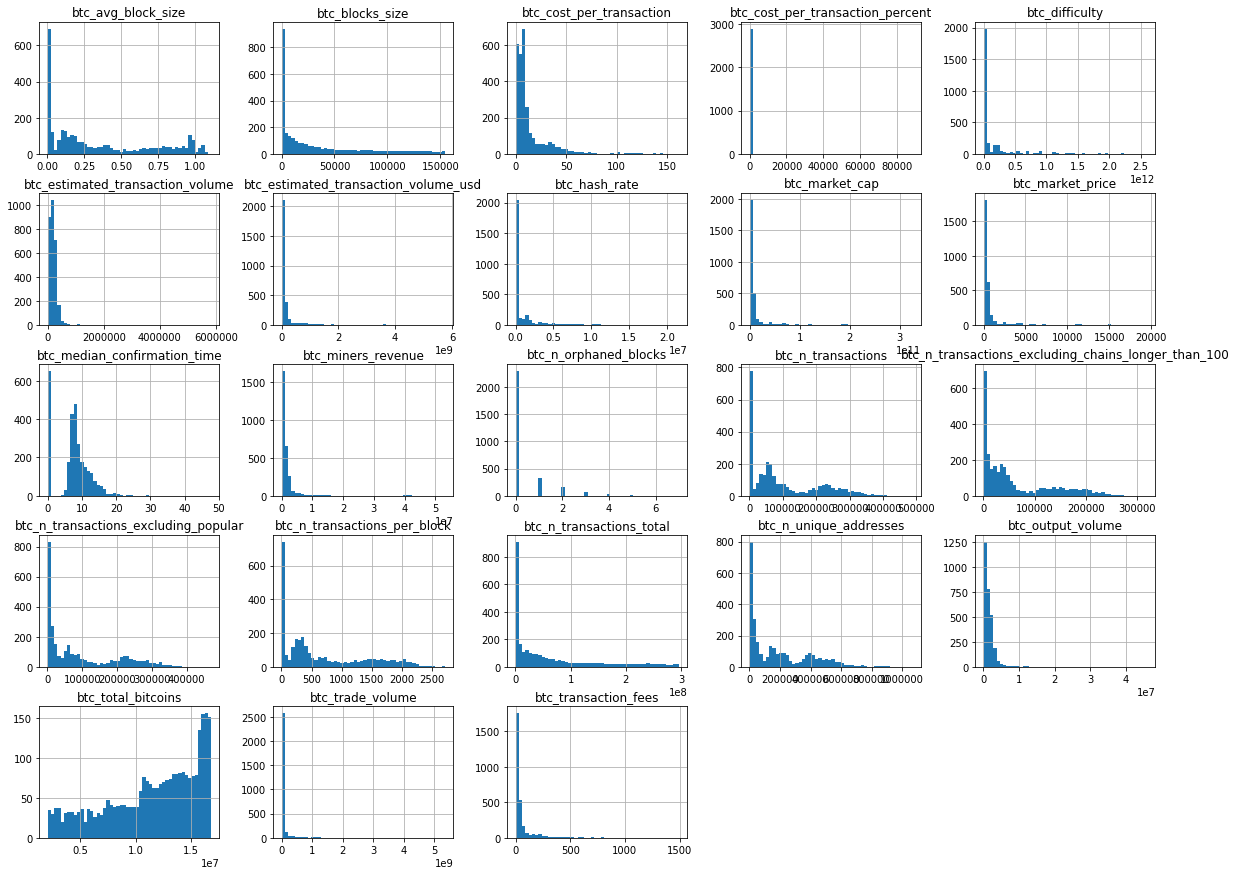

In [8]:
data.hist(bins=50, figsize=(20,15))
plt.show()

- We can see that most variables are positively skewed including target variable btc_market_price. 

#### <font color = red> Plotting correlation heatmap

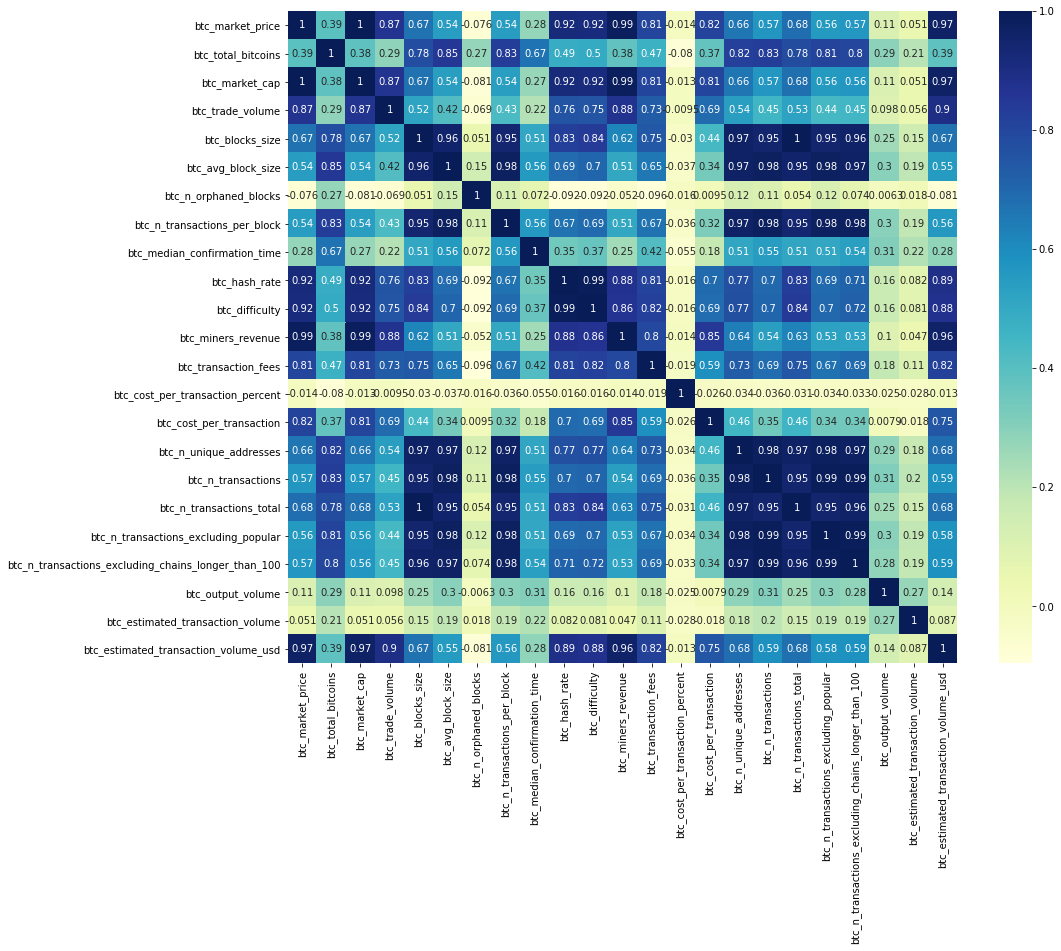

In [9]:
plt.subplots(figsize=(15,12))
corr = data.corr()
sns.heatmap(corr, annot=True,cmap="YlGnBu") 

- We can see that some variables are highly correlated with eachother.

#### <font color = red> Plotting all variables against time

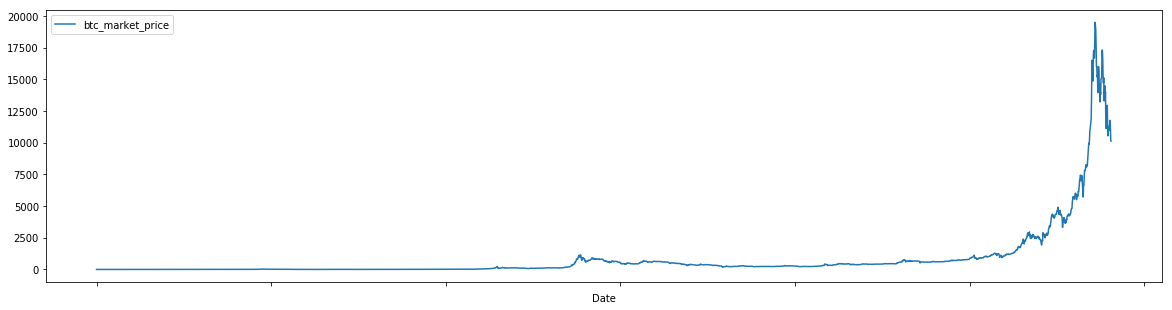

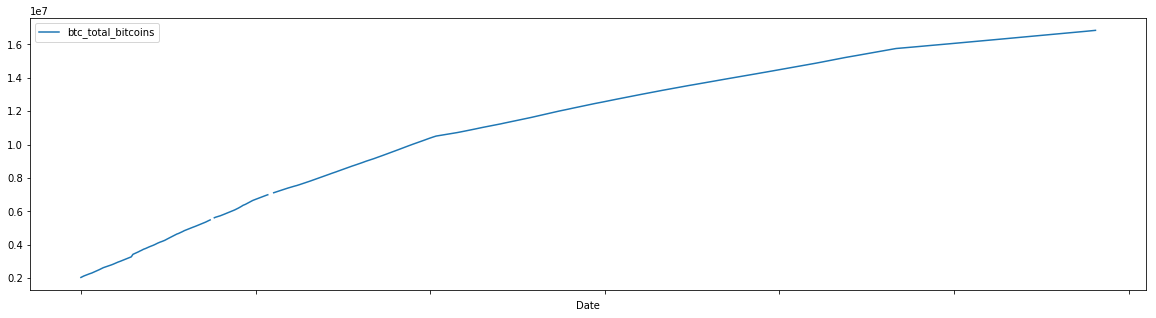

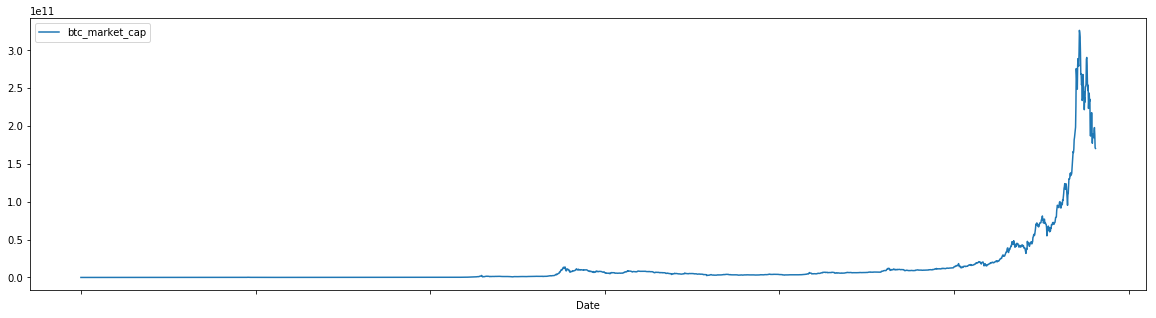

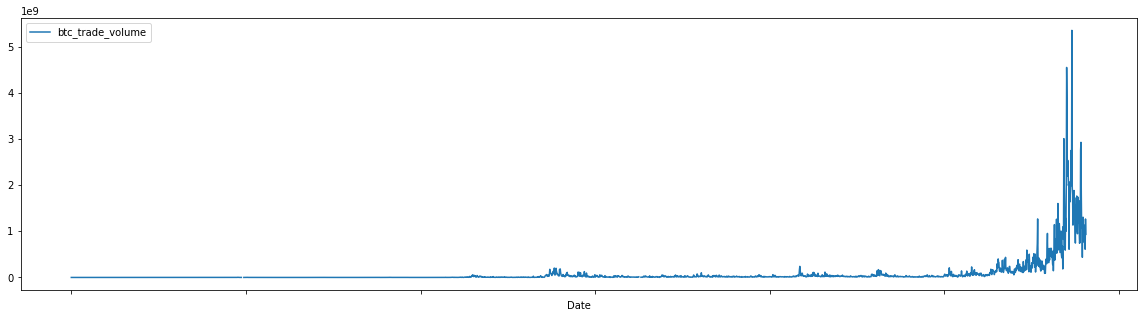

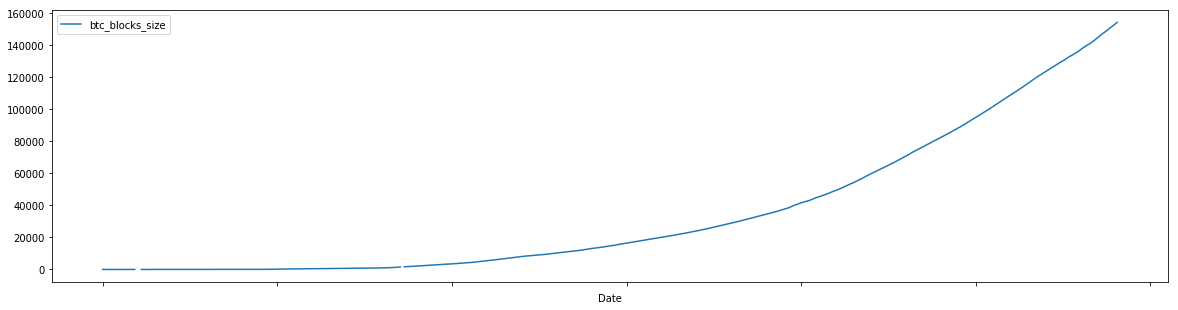

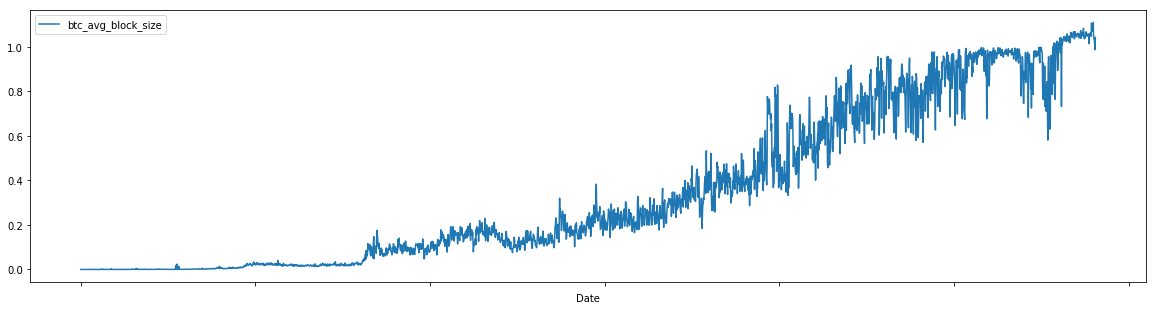

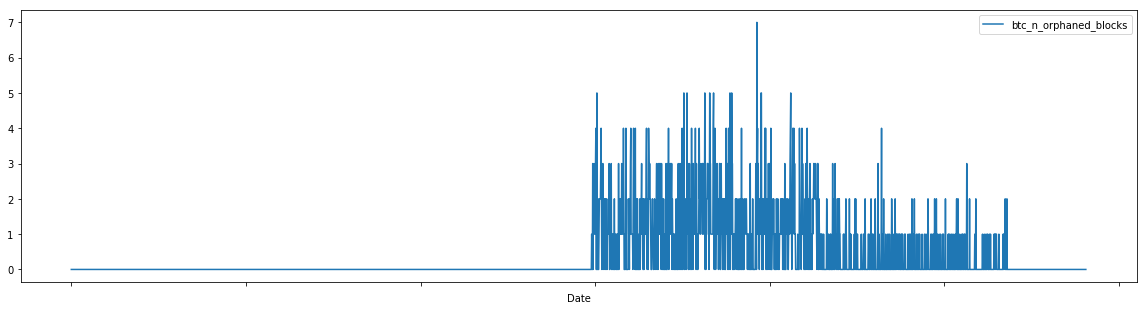

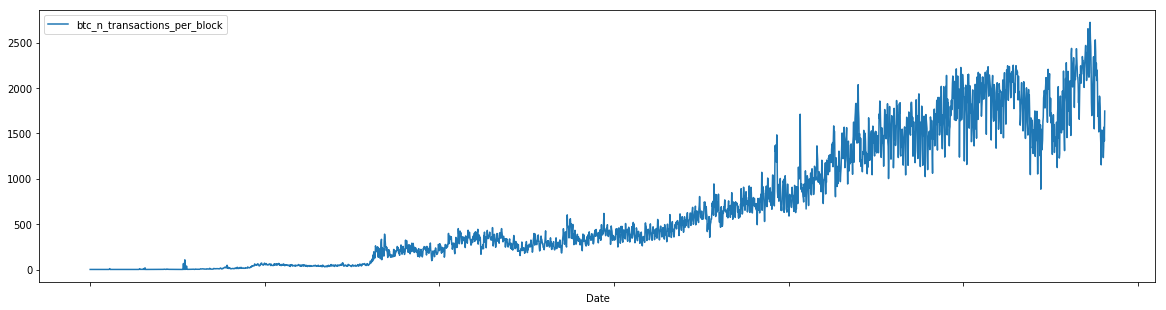

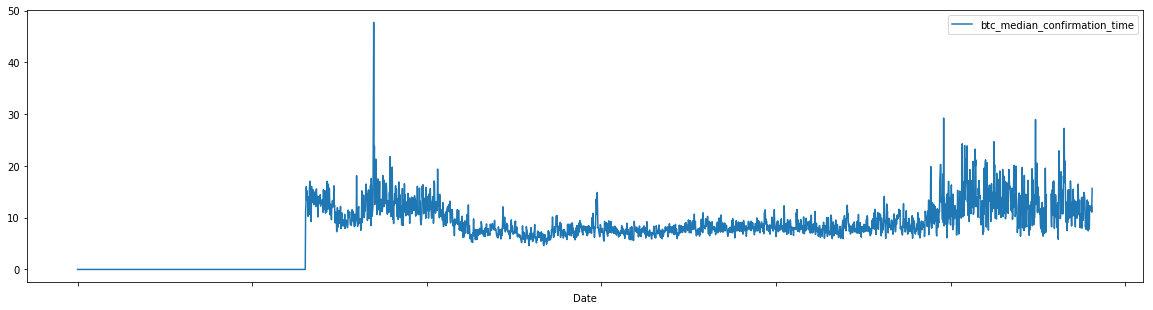

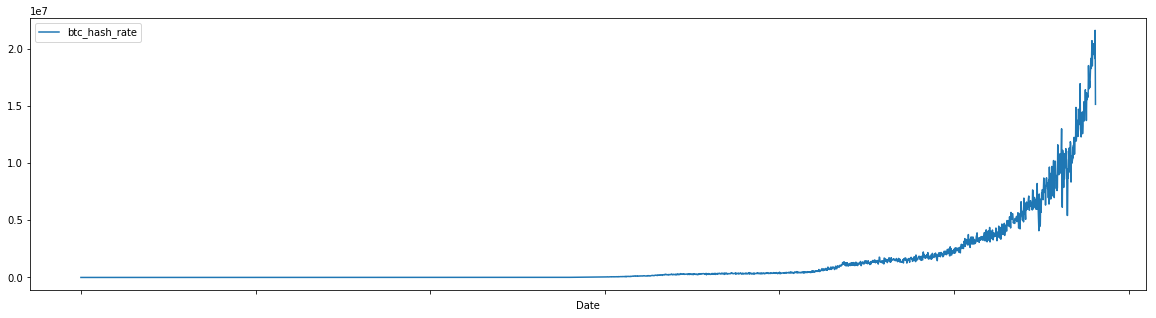

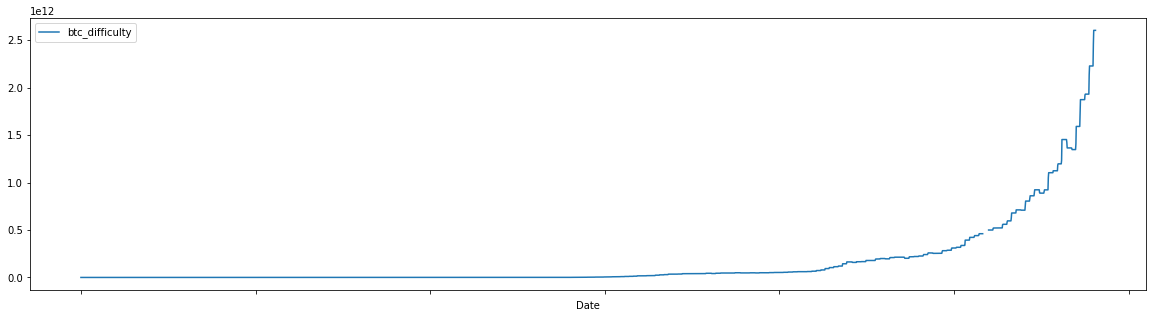

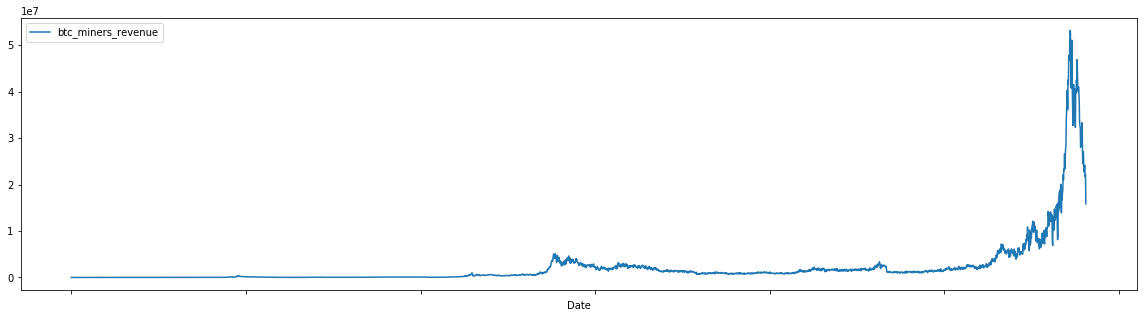

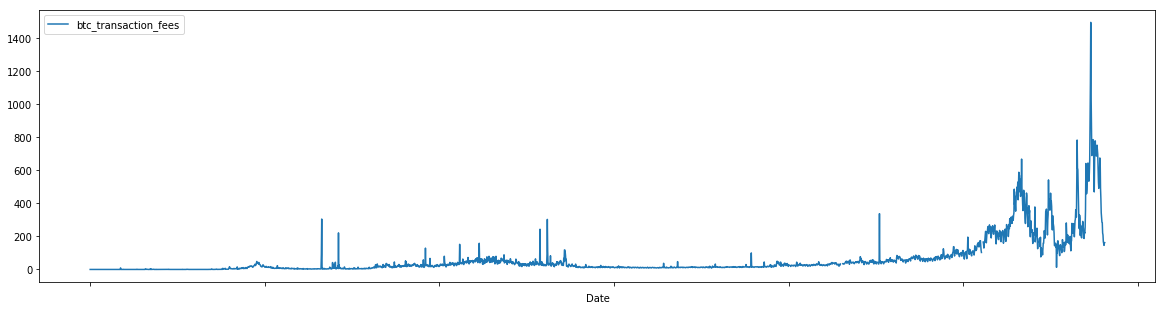

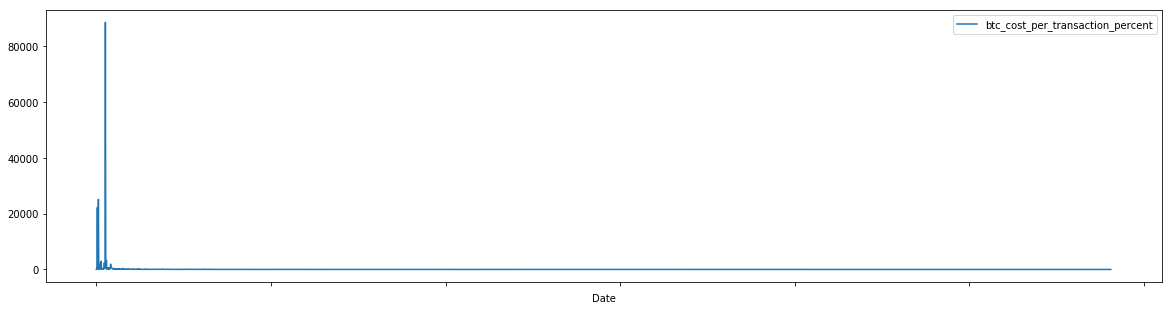

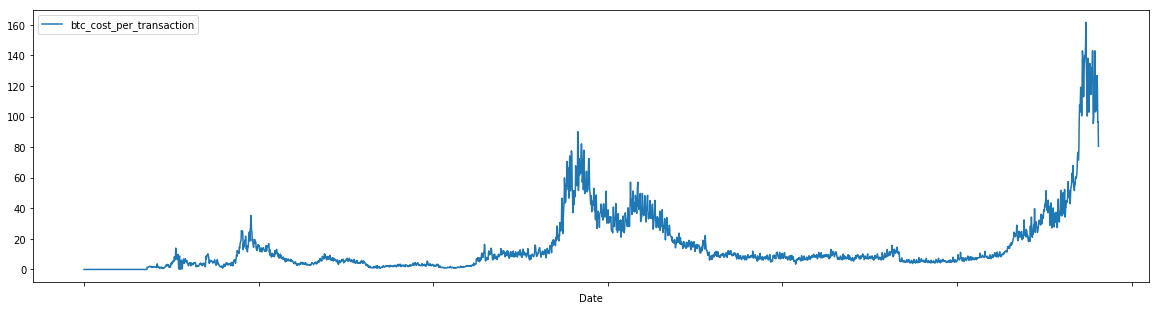

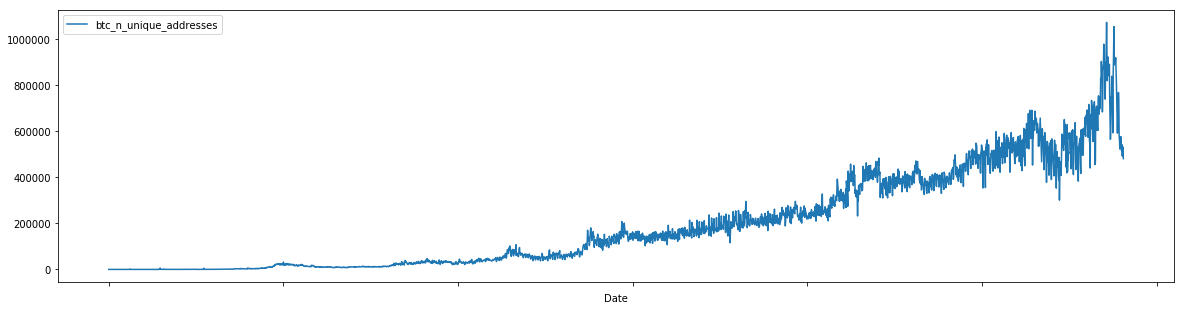

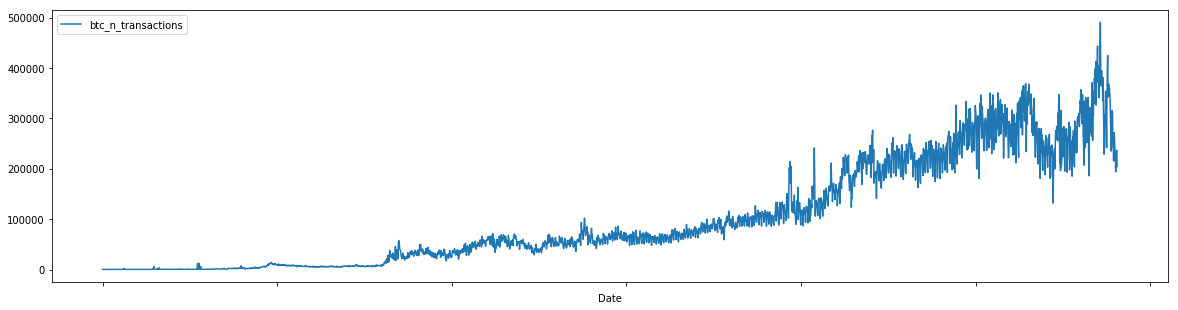

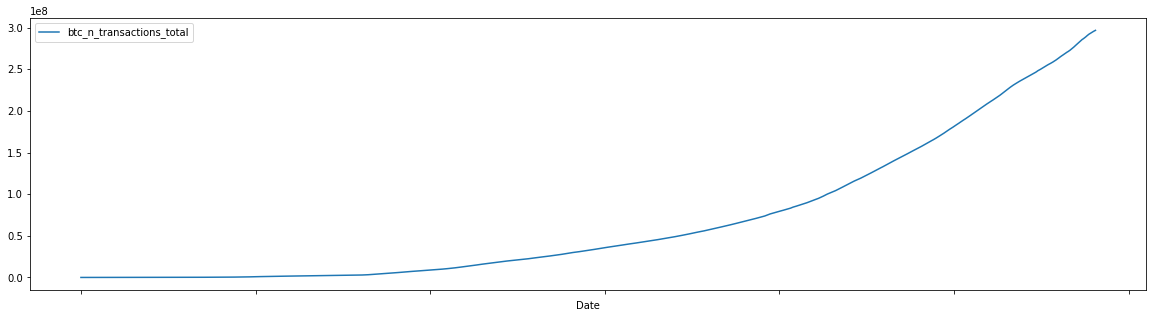

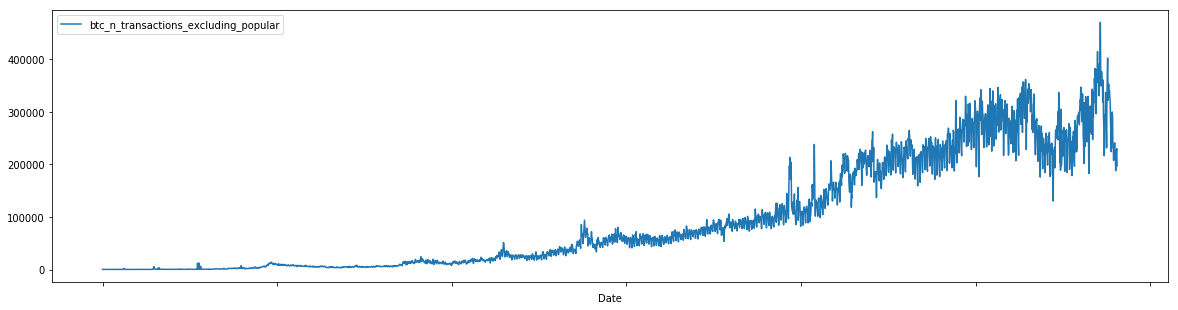

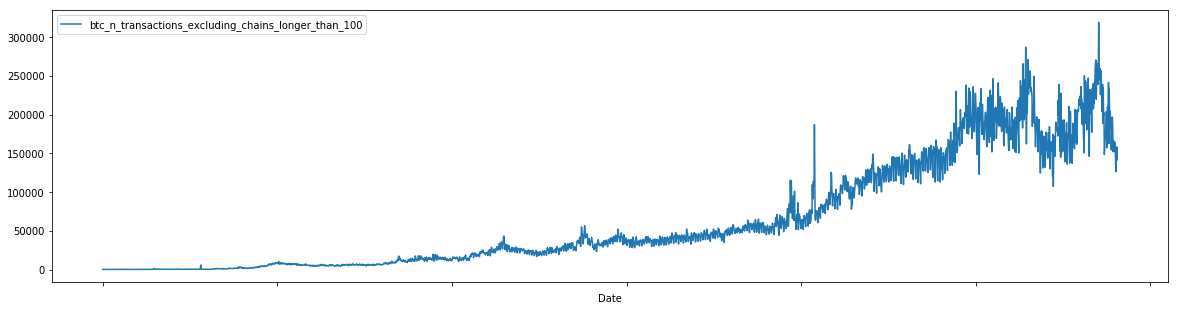

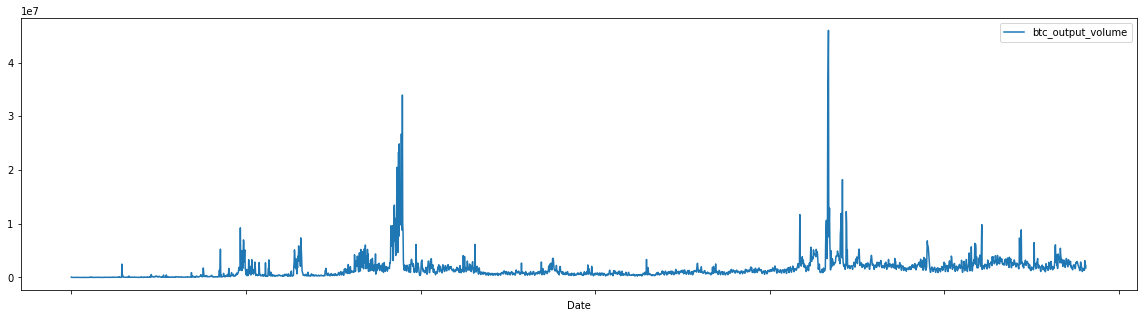

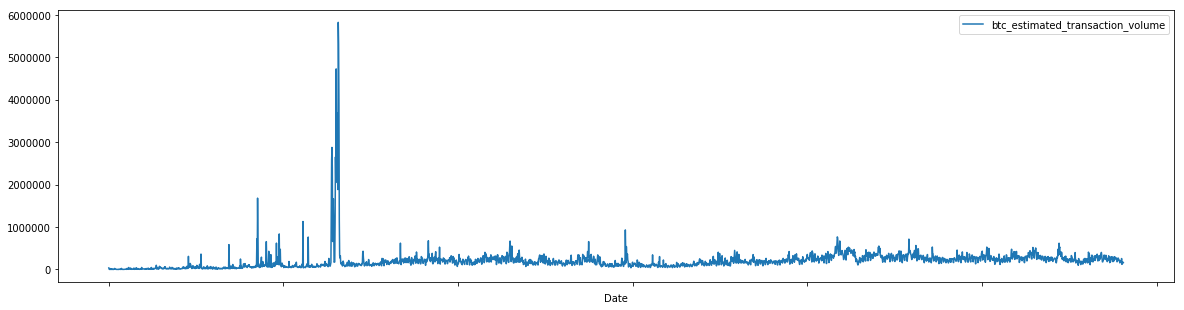

In [10]:
for i in range(1,23):
    data.plot(x='Date', y=data.columns.values[i], figsize=(20,5))
    plt.show()

- We can see that most variables increase exponentially with time including target variable btc_market_price.

#### <font color=blue> 2. Address Missing Data

#### <font color=red> Find Missing Values

In [11]:
def missing_values_table(data): 
        mis_val = data.isnull().sum()
        mis_val_percent = 100 * data.isnull().sum() / len(data)
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        return mis_val_table_ren_columns
missing_values_table(data)

,Missing Values,% of Total Values
Date,0,0.000000
btc_market_price,0,0.000000
btc_total_bitcoins,27,0.929112
btc_market_cap,0,0.000000
btc_trade_volume,21,0.722643
btc_blocks_size,29,0.997935
btc_avg_block_size,0,0.000000
btc_n_orphaned_blocks,0,0.000000
btc_n_transactions_per_block,0,0.000000
btc_median_confirmation_time,12,0.412939


#### <font color=red> Using Forward Fill to impute missing data
    - This method was used since data is dependent on time and next valid observation accomodates for that

In [12]:
data1 = data.fillna(method='pad')

#### <font color='red'> Checking again for any missing values

In [13]:
def missing_values_table(data1): 
        mis_val = data1.isnull().sum()
        mis_val_percent = 100 * data1.isnull().sum() / len(data1)
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        return mis_val_table_ren_columns
missing_values_table(data1)

,Missing Values,% of Total Values
Date,0,0.0
btc_market_price,0,0.0
btc_total_bitcoins,0,0.0
btc_market_cap,0,0.0
btc_trade_volume,0,0.0
btc_blocks_size,0,0.0
btc_avg_block_size,0,0.0
btc_n_orphaned_blocks,0,0.0
btc_n_transactions_per_block,0,0.0
btc_median_confirmation_time,0,0.0


- We can see that there are no missing values in dataset now.

In [14]:
data1.head()

,Date,btc_market_price,btc_total_bitcoins,btc_market_cap,btc_trade_volume,btc_blocks_size,btc_avg_block_size,btc_n_orphaned_blocks,btc_n_transactions_per_block,btc_median_confirmation_time,...,btc_cost_per_transaction_percent,btc_cost_per_transaction,btc_n_unique_addresses,btc_n_transactions,btc_n_transactions_total,btc_n_transactions_excluding_popular,btc_n_transactions_excluding_chains_longer_than_100,btc_output_volume,btc_estimated_transaction_volume,btc_estimated_transaction_volume_usd
0,2/17/2010 0:00,0.0,2043200.0,0.0,0.0,0.0,0.000235,0,1.0,0.0,...,31.781022,0.0,241,244,41240,244,244,65173.13,36500.0,0.0
1,2/18/2010 0:00,0.0,2054650.0,0.0,0.0,0.0,0.000241,0,1.0,0.0,...,154.463801,0.0,234,235,41475,235,235,18911.74,7413.0,0.0
2,2/19/2010 0:00,0.0,2063600.0,0.0,0.0,0.0,0.000228,0,1.0,0.0,...,1278.516635,0.0,185,183,41658,183,183,9749.98,700.0,0.0
3,2/20/2010 0:00,0.0,2074700.0,0.0,0.0,0.0,0.000218,0,1.0,0.0,...,22186.687990,0.0,224,224,41882,224,224,11150.03,50.0,0.0
4,2/21/2010 0:00,0.0,2085400.0,0.0,0.0,0.0,0.000234,0,1.0,0.0,...,689.179876,0.0,218,218,42100,218,218,12266.83,1553.0,0.0


In [15]:
data1.describe()

,btc_market_price,btc_total_bitcoins,btc_market_cap,btc_trade_volume,btc_blocks_size,btc_avg_block_size,btc_n_orphaned_blocks,btc_n_transactions_per_block,btc_median_confirmation_time,btc_hash_rate,...,btc_cost_per_transaction_percent,btc_cost_per_transaction,btc_n_unique_addresses,btc_n_transactions,btc_n_transactions_total,btc_n_transactions_excluding_popular,btc_n_transactions_excluding_chains_longer_than_100,btc_output_volume,btc_estimated_transaction_volume,btc_estimated_transaction_volume_usd
count,2906.000000,2.906000e+03,2.906000e+03,2.906000e+03,2906.000000,2906.000000,2906.000000,2906.000000,2906.000000,2.906000e+03,...,2906.000000,2906.000000,2.906000e+03,2906.000000,2.906000e+03,2906.000000,2906.000000,2.906000e+03,2.906000e+03,2.906000e+03
mean,839.104218,1.146370e+07,1.344255e+10,7.353275e+07,35156.964795,0.350366,0.364074,671.673651,7.529704,1.244070e+06,...,66.747821,14.639125,1.937861e+05,102081.138334,6.844558e+07,94348.852374,63140.320028,1.566216e+06,2.036475e+05,2.024338e+08
std,2304.972497,4.209966e+06,3.866150e+10,2.914134e+08,43539.100578,0.353168,0.842259,689.561322,4.984088,2.924141e+06,...,1761.894646,20.536083,2.089146e+05,103896.929350,8.285341e+07,103966.111763,69687.052174,2.278910e+06,2.682781e+05,5.800513e+08
min,0.000000,2.043200e+06,0.000000e+00,0.000000e+00,0.000000,0.000216,0.000000,1.000000,0.000000,2.250000e-05,...,0.136531,0.000000,1.100000e+02,118.000000,4.124000e+04,118.000000,118.000000,6.150000e+03,7.000000e+00,0.000000e+00
25%,6.653465,8.334900e+06,5.363081e+07,2.968431e+05,750.000000,0.024177,0.000000,54.000000,6.066667,1.160880e+01,...,1.181945,4.156470,1.675475e+04,8025.250000,2.413376e+06,6813.500000,6765.500000,4.901712e+05,9.600325e+04,9.581680e+05
50%,235.130000,1.237281e+07,3.346869e+09,9.983375e+06,14664.500000,0.196022,0.000000,375.000000,7.916667,2.176189e+04,...,2.493564,7.822430,1.304450e+05,62337.000000,3.255271e+07,53483.000000,35283.500000,1.105205e+06,1.784685e+05,3.742576e+07
75%,594.191164,1.517080e+07,8.075525e+09,2.829294e+07,57426.500000,0.676065,0.000000,1232.995223,10.245833,1.035363e+06,...,5.915591,14.800589,3.603765e+05,190471.250000,1.080663e+08,185901.750000,113793.250000,2.031654e+06,2.588046e+05,1.312499e+08
max,19498.683330,1.683769e+07,3.265250e+11,5.352016e+09,154444.590300,1.110327,7.000000,2722.625000,47.733333,2.160975e+07,...,88571.428570,161.686071,1.072861e+06,490644.000000,2.966888e+08,470650.000000,318896.000000,4.599222e+07,5.825066e+06,5.760245e+09


In [16]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2906 entries, 0 to 2905
Data columns (total 24 columns):
Date                                                   2906 non-null object
btc_market_price                                       2906 non-null float64
btc_total_bitcoins                                     2906 non-null float64
btc_market_cap                                         2906 non-null float64
btc_trade_volume                                       2906 non-null float64
btc_blocks_size                                        2906 non-null float64
btc_avg_block_size                                     2906 non-null float64
btc_n_orphaned_blocks                                  2906 non-null int64
btc_n_transactions_per_block                           2906 non-null float64
btc_median_confirmation_time                           2906 non-null float64
btc_hash_rate                                          2906 non-null float64
btc_difficulty                                   

#### <font color=blue> 3. Data Preparation for running Machine Learning Models

#### <font color=red> Dividing Data into X and Y - To be used for Test-train split

In [17]:
X = data1.drop(columns=['Date','btc_market_price'])
y = data1['btc_market_price']

In [18]:
X.head()

,btc_total_bitcoins,btc_market_cap,btc_trade_volume,btc_blocks_size,btc_avg_block_size,btc_n_orphaned_blocks,btc_n_transactions_per_block,btc_median_confirmation_time,btc_hash_rate,btc_difficulty,...,btc_cost_per_transaction_percent,btc_cost_per_transaction,btc_n_unique_addresses,btc_n_transactions,btc_n_transactions_total,btc_n_transactions_excluding_popular,btc_n_transactions_excluding_chains_longer_than_100,btc_output_volume,btc_estimated_transaction_volume,btc_estimated_transaction_volume_usd
0,2043200.0,0.0,0.0,0.0,0.000235,0,1.0,0.0,0.000029,2.527738,...,31.781022,0.0,241,244,41240,244,244,65173.13,36500.0,0.0
1,2054650.0,0.0,0.0,0.0,0.000241,0,1.0,0.0,0.000029,2.527738,...,154.463801,0.0,234,235,41475,235,235,18911.74,7413.0,0.0
2,2063600.0,0.0,0.0,0.0,0.000228,0,1.0,0.0,0.000023,2.527738,...,1278.516635,0.0,185,183,41658,183,183,9749.98,700.0,0.0
3,2074700.0,0.0,0.0,0.0,0.000218,0,1.0,0.0,0.000028,2.527738,...,22186.687990,0.0,224,224,41882,224,224,11150.03,50.0,0.0
4,2085400.0,0.0,0.0,0.0,0.000234,0,1.0,0.0,0.000027,2.527738,...,689.179876,0.0,218,218,42100,218,218,12266.83,1553.0,0.0


In [19]:
X.shape

(2906, 22)

In [20]:
y.shape

(2906,)

In [21]:
y.head()

0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: btc_market_price, dtype: float64

#### <font color=red> Splitting X and y into to train-test
    - This will create four datasets. Train and test sets for both X and y.

In [22]:
from sklearn.model_selection import train_test_split

X_train_org, X_test_org, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 10)

In [23]:
X_train_org.shape

(2324, 22)

In [24]:
X_test_org.shape

(582, 22)

In [25]:
y_train.shape

(2324,)

In [26]:
y_test.shape

(582,)

#### <font color=red> Scaling Data using Min-Max Scaler
    - We use MinMaxScaler because it doesn't change underlying structure of data. It just brings values between 0 and 1.
    - Standardisation changes underlying structure of data by changing Mean and Standard deviation of variables.

In [27]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train_org)
X_test = scaler.transform(X_test_org)

In [28]:
X_train.shape

(2324, 22)

## <font color = blue> III. Applying models with grid search and cross-validation

## <font color = blue> 1. KNN Regression

In [29]:
from sklearn.neighbors import KNeighborsRegressor

# training model on train data
knnreg = KNeighborsRegressor()
knnreg.fit(X_train, y_train)

# Predicting btc_market_price for test data
# print('Predicted values for test data:')
# print(knnreg.predict(X_test))

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=1, n_neighbors=5, p=2,
          weights='uniform')

In [30]:
print('Train Data score: {}'
     .format(knnreg.score(X_train, y_train)))
print('Test Data score: {}'
     .format(knnreg.score(X_test, y_test)))

Train Data score: 0.9961159036270131
Test Data score: 0.9891083450593395


### <font color=red> Grid Search- KNN

In [31]:
from sklearn.model_selection import GridSearchCV
param_grid = {'n_neighbors': [1, 3, 5, 7, 9, 11, 15]}
knn = KNeighborsRegressor()
clf = GridSearchCV(knn,param_grid,cv=10)

In [32]:
clf.fit(X_train,y_train)

GridSearchCV(cv=10, error_score='raise',
       estimator=KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=1, n_neighbors=5, p=2,
          weights='uniform'),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'n_neighbors': [1, 3, 5, 7, 9, 11, 15]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [33]:
clf.best_params_

{'n_neighbors': 5}

In [34]:
from sklearn.model_selection import GridSearchCV
param_grid = {'n_neighbors': [4, 5, 6, 7, 8, 9]}
knn = KNeighborsRegressor()
clf = GridSearchCV(knn,param_grid,cv=10)

In [35]:
clf.fit(X_train,y_train)

GridSearchCV(cv=10, error_score='raise',
       estimator=KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=1, n_neighbors=5, p=2,
          weights='uniform'),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'n_neighbors': [4, 5, 6, 7, 8, 9]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [36]:
clf.best_params_

{'n_neighbors': 5}

In [37]:
print("Best cross-validation score: {}".format(clf.best_score_))

Best cross-validation score: 0.9934774623133517


### Best Parameter for KNN Regressor: - N_Neighbors = 5

### <font color=red> Plotting true values vs predicted values - KNN

Text(0,0.5,'Predictions')

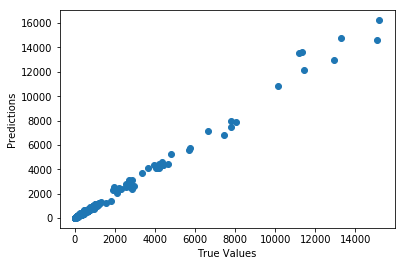

In [38]:
knnreg = KNeighborsRegressor(n_neighbors=5)
knnreg.fit(X_train, y_train)
predictions = knnreg.predict(X_test)
plt.scatter(y_test, predictions)
plt.xlabel("True Values")
plt.ylabel("Predictions")

### <font color=red> Calculating RMSE - KNN

In [39]:
from sklearn.metrics import mean_squared_error
from math import sqrt
predictions = knnreg.predict(X_test)
rmse= sqrt(mean_squared_error(y_test, predictions))
rmse

183.11484780535216

### <font color=red> Checking Cross Validation Score- KNN

In [40]:
from sklearn.model_selection import cross_val_score
knn = KNeighborsRegressor(n_neighbors=5)
scores = cross_val_score(knn, X_train, y_train, cv=10)
print("Cross validation scores: {}".format(scores))

Cross validation scores: [0.99615153 0.99493006 0.9835883  0.99385572 0.99369297 0.99499688
 0.99503337 0.99378422 0.99690589 0.99185888]


In [41]:
print("Average cross-validation score: {}".format(scores.mean()))

Average cross-validation score: 0.9934797831052009


### Average cross-validation score for KNN Regressor: - 0.9934797831052009                                      

## <font color = blue> 2. Linear Regression

In [42]:
import numpy as np
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train, y_train)
y_predict = lr.predict(X_train)

print("lr.coef_: {}".format(lr.coef_))

print("lr.intercept_: {}".format(lr.intercept_))

lr.coef_: [-6.50239548e+01  1.87676290e+04  2.97677698e+01 -3.28765071e+03
  2.52193682e+01 -4.98687011e+00 -3.56370536e+01  2.81077292e+01
 -4.84637439e+02  2.08826020e+02  3.51420607e+02 -2.11823635e+02
  2.97983828e+00  4.21231980e+02  1.33375354e+02  4.70858026e+01
  3.42260268e+03 -2.40180874e+01  2.07857214e+01  5.10911264e+00
  3.79565515e+00  1.18486031e+02]
lr.intercept_: -1.0530913665777462


In [43]:
print('Train Data score: {}'
     .format(lr.score(X_train, y_train)))

print('Test Data score/ R Square: {}'
     .format(lr.score(X_test, y_test)))

Train Data score: 0.9999616806623907
Test Data score/ R Square: 0.999927079901202


### <font color=red> Plotting true values vs predicted values - Linear regression

Text(0,0.5,'Predictions')

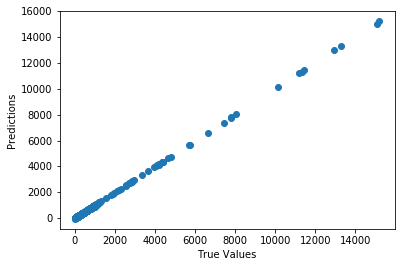

In [44]:
lr = LinearRegression()
lr.fit(X_train, y_train)
predictions = lr.predict(X_test)
plt.scatter(y_test, predictions)
plt.xlabel("True Values")
plt.ylabel("Predictions")

### <font color=red> Calculating RMSE - Linear Regression

In [45]:
from sklearn.metrics import mean_squared_error
from math import sqrt
predictions = lr.predict(X_test)
rmse= sqrt(mean_squared_error(y_test, predictions))
rmse

14.983050647178562

### <font color=red> Checking Cross Validation Score- Linear Regression

In [46]:
scores = cross_val_score(lr, X_train, y_train, cv=10)
print("Cross validation scores: {}".format(scores))

Cross validation scores: [0.99995234 0.999956   0.99995567 0.99995882 0.99997663 0.9999741
 0.99994958 0.99996061 0.99995202 0.99993804]


In [47]:
print("Average cross-validation score: {}".format(scores.mean()))

Average cross-validation score: 0.9999573806978631


### Avg Cross Validation Score for Linear Regression: - 0.9999573806978631

## <font color = blue> 3. Ridge Regression

#### <font color=red> 1. With default alpha = 1.0

In [48]:
from sklearn.linear_model import Ridge

ridge = Ridge()
ridge.fit(X_train,y_train)

print('Ridge regression linear model coeff (w):\n{}'
      .format(ridge.coef_))
print('\n')

print('Ridge Regression linear model intercept (b):\n {:.3f}'
      .format(ridge.intercept_))
print('\n')

Ridge regression linear model coeff (w):
[-184.32795139 7749.71504265 1051.217005    -19.74842994   68.0896522
   24.00579132  463.13874589  154.78350843  810.6068543  2095.38700618
 5687.06610615  -53.78411929   -9.00579447  978.06934285  254.2437361
 -129.81124095  -92.75207692 -478.26048559 -194.22538796  -93.41585731
  -87.53090924 2858.12990975]


Ridge Regression linear model intercept (b):
 12.751




In [49]:
print('R-squared score (training):\n {:.3f}'
       .format(ridge.score(X_train, y_train)))
print('\n')

print('R-squared score (test):\n {:.3f}'
       .format(ridge.score(X_test,y_test)))

R-squared score (training):
 0.997


R-squared score (test):
 0.992


### <font color=red> Grid Search- Ridge

In [50]:
param_grid = {'alpha':[0.01, 1, 5, 10, 100, 10000]}

grid_search = GridSearchCV(ridge, param_grid, cv = 5)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'alpha': [0.01, 1, 5, 10, 100, 10000]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [51]:
print('Best parameters: {}'.format(grid_search.best_params_))

Best parameters: {'alpha': 0.01}


In [52]:
param_grid = {'alpha':[0.000001, 0.00001, 0.0001, 0.01]}

grid_search = GridSearchCV(ridge, param_grid, cv = 5)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'alpha': [1e-06, 1e-05, 0.0001, 0.01]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [53]:
print('Best parameters: {}'.format(grid_search.best_params_))

Best parameters: {'alpha': 0.0001}


In [54]:
print('Best Score: {}'.format(grid_search.best_score_))

Best Score: 0.9999570465971983


### Best Parameter for Ridge Regressor: - Alpha=0.0001                               

### <font color=red> Calculating RMSE - Ridge

In [55]:
from sklearn.metrics import mean_squared_error
from math import sqrt
ridge = Ridge().fit(X_train, y_train)
predictions = ridge.predict(X_test)
rmse= sqrt(mean_squared_error(y_test, predictions))
rmse

161.26884159767434

### <font color=red> Checking Cross Validation Score- Ridge

In [56]:
ridge=Ridge(alpha=0.0001)

In [57]:
scoresr = cross_val_score(ridge, X_train, y_train, cv=5)
print("Cross validation scores: {}".format(scoresr))

Cross validation scores: [0.99995416 0.99995774 0.99997556 0.99995464 0.9999431 ]


In [58]:
print("Average cross-validation score: {}".format(scoresr.mean()))

Average cross-validation score: 0.9999570406005025


### Avg Cross Validation Score for Ridge Regressor: - 0.9999570406005027

## <font color = blue> 4. Lasso Regression

#### <font color=red> 1. With default alpha = 0

In [59]:
from sklearn.linear_model import Lasso

lasso = Lasso().fit(X_train,y_train)

print('Lasso regression linear model coeff (w):\n{}'
      .format(lasso.coef_))
print('\n')

print('Lasso Regression linear model intercept (b):\n {:.3f}'
      .format(lasso.intercept_))

Lasso regression linear model coeff (w):
[2.71688243e+00 1.88060324e+04 0.00000000e+00 1.36488101e+01
 1.09427588e+01 0.00000000e+00 1.58865591e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 5.35719270e+02 7.16897123e+01 0.00000000e+00
 5.52592708e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 9.52795532e+00]


Lasso Regression linear model intercept (b):
 -6.943


In [60]:
print('R-squared score (training):\n {}'
       .format(lasso.score(X_train, y_train)))
print('\n')

print('R-squared score (test):\n {}'
       .format(lasso.score(X_test, y_test)))
print('\n')

print("Number of features used: {}".format(np.sum(lasso.coef_ != 0)))

R-squared score (training):
 0.9999029897795678


R-squared score (test):
 0.9998649485738416


Number of features used: 9


In [61]:
print('Features with non-zero weight (sorted by absolute magnitude):')
for e in sorted (list(zip(list(X), lasso.coef_)),
                key = lambda e: -abs(e[1])):
    if e[1] != 0:
        print('\t{}, {:.3f}'.format(e[0], e[1]))

Features with non-zero weight (sorted by absolute magnitude):
	btc_market_cap, 18806.032
	btc_cost_per_transaction, 535.719
	btc_n_unique_addresses, 71.690
	btc_blocks_size, 13.649
	btc_avg_block_size, 10.943
	btc_estimated_transaction_volume_usd, 9.528
	btc_n_transactions_total, 5.526
	btc_total_bitcoins, 2.717
	btc_n_transactions_per_block, 1.589


### <font color=red> Grid Search- Lasso

In [62]:
lasso = Lasso(max_iter = 10000).fit(X_train, y_train)
param_grid = {'alpha':[1, 5, 10, 20, 100]}

grid_search = GridSearchCV(lasso, param_grid, cv = 5)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=10000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'alpha': [1, 5, 10, 20, 100]}, pre_dispatch='2*n_jobs',
       refit=True, return_train_score='warn', scoring=None, verbose=0)

In [63]:
print('Best parameters: {}'.format(grid_search.best_params_))
print('Best score: {}'.format(grid_search.best_score_))

Best parameters: {'alpha': 1}
Best score: 0.9998948262651768


In [64]:
lasso = Lasso(alpha=1.0).fit(X_train, y_train)
print("Number of features used: {}".format(np.sum(lasso.coef_ != 0)))

Number of features used: 9


In [65]:
lasso = Lasso(max_iter = 10000).fit(X_train, y_train)
param_grid = {'alpha':[0.001, 0.01, 0.1, 0.5, 1, 3]}

grid_search = GridSearchCV(lasso, param_grid, cv = 5)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=10000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'alpha': [0.001, 0.01, 0.1, 0.5, 1, 3]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [66]:
print('Best parameters: {}'.format(grid_search.best_params_))
print('Best score: {}'.format(grid_search.best_score_))

Best parameters: {'alpha': 0.01}
Best score: 0.9999317591228691


In [67]:
lasso = Lasso(alpha=0.01).fit(X_train, y_train)
print("Number of features used: {}".format(np.sum(lasso.coef_ != 0)))

Number of features used: 22


In [68]:
lasso = Lasso(max_iter = 10000)
lasso.fit(X_train, y_train)
param_grid = {'alpha':[0.005, 0.01, 0.015, 0.02, 0.03, 0.04, 0.05]}

grid_search = GridSearchCV(lasso, param_grid, cv = 5)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=10000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'alpha': [0.005, 0.01, 0.015, 0.02, 0.03, 0.04, 0.05]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [69]:
print('Best parameters: {}'.format(grid_search.best_params_))
print('Best score: {}'.format(grid_search.best_score_))

Best parameters: {'alpha': 0.03}
Best score: 0.999934280897827


### Best Parameter for Lasso Regressor: Alpha=0.03  ;  Optimal Number of Features: 16

Optimal Number of Features

In [70]:
lasso = Lasso(alpha=0.03).fit(X_train, y_train)
print("Number of features used: {}".format(np.sum(lasso.coef_ != 0)))

Number of features used: 16


Optimal Features in Data Set

In [71]:
print('Features with non-zero weight (sorted by absolute magnitude):')
for e in sorted (list(zip(list(X), lasso.coef_)),
                key = lambda e: -abs(e[1])):
    if e[1] != 0:
        print('\t{}, {:.3f}'.format(e[0], e[1]))

Features with non-zero weight (sorted by absolute magnitude):
	btc_market_cap, 18990.876
	btc_cost_per_transaction, 533.070
	btc_hash_rate, -284.430
	btc_estimated_transaction_volume_usd, 184.298
	btc_n_transactions_excluding_chains_longer_than_100, 124.952
	btc_blocks_size, 70.818
	btc_n_transactions_per_block, -65.069
	btc_transaction_fees, -60.649
	btc_n_unique_addresses, 52.502
	btc_median_confirmation_time, 36.228
	btc_n_transactions_excluding_popular, -32.634
	btc_total_bitcoins, 10.548
	btc_avg_block_size, -10.479
	btc_estimated_transaction_volume, -8.557
	btc_n_transactions_total, 4.059
	btc_output_volume, -2.758


### <font color=red> Calculating RMSE - Lasso

In [72]:
from sklearn.metrics import mean_squared_error
from math import sqrt
lasso=Lasso(alpha=0.03, max_iter=10000).fit(X_train, y_train)
predictions = lasso.predict(X_test)
rmse= sqrt(mean_squared_error(y_test, predictions))
rmse

18.554574298991344

### <font color=red> Checking Cross Validation Score- Lasso

In [73]:
lasso=Lasso(alpha=0.03, max_iter=10000)

In [74]:
scoresla = cross_val_score(lasso, X_train, y_train, cv=5)
print("Cross validation scores: {}".format(scoresla))

Cross validation scores: [0.99992649 0.99994249 0.99995667 0.99993676 0.99990894]


In [75]:
print("Average cross-validation score: {}".format(scoresla.mean()))

Average cross-validation score: 0.9999342699971038


In [76]:
print('Lasso regression: effect of alpha regularization\n\
parameter on number of features kept in final model\n')

for alpha in [0.01, 0.03, 1, 5, 10, 20, 50]:
    lasso = Lasso(alpha, max_iter = 10000).fit(X_train, y_train)
    r2_train = lasso.score(X_train, y_train)
    r2_test = lasso.score(X_test, y_test)
    
    print('Alpha = {:.2f}\nFeatures kept: {}, r-squared training: {}, \
r-squared test: {}\n'
         .format(alpha, np.sum(lasso.coef_ != 0), r2_train, r2_test))

Lasso regression: effect of alpha regularization
parameter on number of features kept in final model

Alpha = 0.01
Features kept: 22, r-squared training: 0.9999381988727288, r-squared test: 0.9998864868559793

Alpha = 0.03
Features kept: 16, r-squared training: 0.9999401334853577, r-squared test: 0.999888172467378

Alpha = 1.00
Features kept: 9, r-squared training: 0.9999029897795678, r-squared test: 0.9998649485738416

Alpha = 5.00
Features kept: 4, r-squared training: 0.9995910142739456, r-squared test: 0.9996477746757225

Alpha = 10.00
Features kept: 4, r-squared training: 0.998650806321881, r-squared test: 0.9988268233503574

Alpha = 20.00
Features kept: 3, r-squared training: 0.9948656165582248, r-squared test: 0.9952705615849096

Alpha = 50.00
Features kept: 2, r-squared training: 0.969085816777044, r-squared test: 0.9715155025979808



### Average cross-validation score for Lasso: 0.9999342699971038

## <font color = blue> 5. Polynomial Regression

In [77]:
from sklearn.preprocessing import PolynomialFeatures

- Now we transform the original input data to add polynomial features up to degree 2 (quadratic)

In [78]:
poly = PolynomialFeatures(degree = 2)

X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.fit_transform(X_test)

In [79]:
X_train_poly.shape

(2324, 276)

In [80]:
X_test_poly.shape

(582, 276)

In [81]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

lr.fit(X_train_poly, y_train)
# lr.predict(X_test_poly)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [82]:
# print('(poly deg 2) linear model coeff (w):\n{}'
#     .format(lr.coef_))

In [83]:
print('(poly deg 2) linear model intercept (b): {}'
     .format(lr.intercept_))
print('(poly deg 2) R-squared score (training): {}'
     .format(lr.score(X_train_poly, y_train)))
print('(poly deg 2) R-squared score (test): {}\n'
     .format(lr.score(X_test_poly, y_test)))

(poly deg 2) linear model intercept (b): 0.4879467472055694
(poly deg 2) R-squared score (training): 0.999997697678691
(poly deg 2) R-squared score (test): 0.9999966172101282



### Addition of many polynomial features often leads to overfitting, so we often use polynomial features in combination with regression that has a regularization penalty, like ridge regression

In [84]:
ridge = Ridge().fit(X_train_poly, y_train)

print('(poly deg 2 + ridge) linear model coeff (w):\n{}'
     .format(ridge.coef_))

(poly deg 2 + ridge) linear model coeff (w):
[ 0.00000000e+00 -9.56963301e+01  1.34809743e+03  1.06246476e+02
 -1.10905222e+02  2.78204402e+02  3.96527805e+01 -8.08648721e+01
  2.70066009e+01 -1.49124388e+02  2.74112886e+02  6.43318292e+02
 -6.97642265e+00  7.43250972e+00  5.17952667e+02  6.89100902e+01
  1.19499140e+02 -5.57116849e+01  5.42460823e+01  3.22086491e+01
 -2.76140821e+01 -1.63575324e+01  3.26005776e+02  1.09915320e+02
  1.30081040e+03  8.49978617e+01 -1.32050551e+02  3.00054771e+01
  5.29329388e+00 -1.06505181e+02  8.14842724e+01 -1.32783891e+02
  2.86583227e+02  5.95600765e+02  1.19868552e+01 -5.46670870e-02
  7.55126235e+02 -1.57955164e+01 -8.67773301e+00 -8.86333252e+01
 -5.88117736e+01 -3.20569513e+01  4.58426103e+00 -6.10477968e+01
  2.83034121e+02  6.10329511e+02  9.74990594e+01  1.12152908e+03
  1.13488237e+03  3.03105167e+00  1.03784507e+03  2.76490242e+02
  1.49195061e+02  3.85889649e+02  2.16161904e+02 -8.89977124e+01
  1.47034643e-02  3.72527466e+02  6.03647899e

In [85]:
print('(poly deg 2 + ridge) linear model intercept (b): {}'
     .format(ridge.intercept_))
print('(poly deg 2 + ridge) R-squared score (training): {}'
     .format(ridge.score(X_train_poly, y_train)))
print('(poly deg 2 + ridge) R-squared score (test): {}'
     .format(ridge.score(X_test_poly, y_test)))

(poly deg 2 + ridge) linear model intercept (b): -8.372361318113008
(poly deg 2 + ridge) R-squared score (training): 0.9994441964060943
(poly deg 2 + ridge) R-squared score (test): 0.9990233422251773


### <font color=red> Grid Search- Polynomial with Ridge

In [86]:
ridge = Ridge()
param_grid = {'alpha' : [0.01, 1, 5, 10, 50 , 100]}
grid_search = GridSearchCV(ridge, param_grid, cv = 5)
grid_search.fit(X_train_poly, y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'alpha': [0.01, 1, 5, 10, 50, 100]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [87]:
print('Best parameter: {}'.format(grid_search.best_params_))
print('Best score: {}'.format(grid_search.best_score_))

Best parameter: {'alpha': 0.01}
Best score: 0.9999523346985439


In [88]:
param_grid = {'alpha' : [0.000001, 0.00001, 0.0001, 0.01, 0.05]}
grid_search = GridSearchCV(ridge, param_grid, cv = 5)
grid_search.fit(X_train_poly, y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'alpha': [1e-06, 1e-05, 0.0001, 0.01, 0.05]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [89]:
print('Best parameter: {}'.format(grid_search.best_params_))
print('Best score: {}'.format(grid_search.best_score_))

Best parameter: {'alpha': 1e-05}
Best score: 0.9999943631903166


### Best Parameter for Polynomial with Ridge Regressor: - Alpha=0.00001

### <font color=red> Calculating RMSE - Polynomial

In [90]:
from sklearn.metrics import mean_squared_error
from math import sqrt
ridge=Ridge(alpha=0.00001)
ridge.fit(X_train_poly, y_train)
predictions = ridge.predict(X_test_poly)
rmse= sqrt(mean_squared_error(y_test, predictions))
rmse

2.7556673443248783

### <font color=red> Checking Cross Validation Score- Polynomial with Ridge

In [91]:
ridge=Ridge(alpha=0.00001)

In [92]:
scoresp = cross_val_score(ridge, X_train_poly, y_train, cv=5)
print("Cross validation scores: {}".format(scoresp))

Cross validation scores: [0.99999523 0.99999637 0.99999382 0.99999078 0.99999562]


In [93]:
print("Average cross-validation score: {}".format(scoresp.mean()))

Average cross-validation score: 0.9999943637288977


### Avg Cross Validation Score for Polynomial with Ridge Regressor: - 0.9999943637288977

## <font color = blue> 6. SVM Regression

### <font color=red> SVR Simple Kernels

In [94]:
from sklearn.svm import LinearSVR
import matplotlib.pyplot as plt

In [95]:
lsvr = LinearSVR(random_state=10).fit(X_train, y_train)
print('Coefficients:\n', lsvr.coef_)
print('Intercepts:\n', lsvr.intercept_)

Coefficients:
 [ 45.43418249  84.09874733  33.66255225 195.52471815 142.74706764
 -10.42857143 112.27154668  -7.39127391 102.53648308 109.81415527
  75.51829036  70.37351915   1.88035371 119.21985793 115.71472658
 104.08442773 198.91151927 114.97699578 125.994707   -18.47216332
 -13.56032507  67.69168935]
Intercepts:
 [-13.66141422]


In [96]:
print('Accuracy of Linear SVR classifier on training set: {}'
     .format(lsvr.score(X_train, y_train)))
print('Accuracy of Linear SVR classifier on test set: {}'
     .format(lsvr.score(X_test, y_test)))

Accuracy of Linear SVR classifier on training set: 0.1327168264351839
Accuracy of Linear SVR classifier on test set: 0.18361180729313972


In [97]:
lsvr = LinearSVR(random_state=10).fit(X_train, y_train)
param_grid = {'C':[0.0001, 0.001, 0.01, 1, 10, 100, 1000],
             'epsilon': [100, 1000, 10000]}

grid_search = GridSearchCV(lsvr, param_grid, cv = 5)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=LinearSVR(C=1.0, dual=True, epsilon=0.0, fit_intercept=True,
     intercept_scaling=1.0, loss='epsilon_insensitive', max_iter=1000,
     random_state=10, tol=0.0001, verbose=0),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'C': [0.0001, 0.001, 0.01, 1, 10, 100, 1000], 'epsilon': [100, 1000, 10000]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [98]:
print('Best parameter of Linear SVR Regressor: {}'.format(grid_search.best_params_))
print('Best score of Linear SVR Regressor: {}'.format(grid_search.best_score_))

Best parameter of Linear SVR Regressor: {'C': 1000, 'epsilon': 100}
Best score of Linear SVR Regressor: 0.9977000135726352


In [99]:
lsvr = LinearSVR(random_state=10).fit(X_train, y_train)
param_grid = {'C':[1000, 10000, 100000, 1000000, 10000000],
             'epsilon': [0.1,0,1, 10, 100]}

grid_search = GridSearchCV(lsvr, param_grid, cv = 5)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=LinearSVR(C=1.0, dual=True, epsilon=0.0, fit_intercept=True,
     intercept_scaling=1.0, loss='epsilon_insensitive', max_iter=1000,
     random_state=10, tol=0.0001, verbose=0),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'C': [1000, 10000, 100000, 1000000, 10000000], 'epsilon': [0.1, 0, 1, 10, 100]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [100]:
print('Best parameter of Linear SVR Regressor: {}'.format(grid_search.best_params_))
print('Best score of Linear SVR Regressor: {}'.format(grid_search.best_score_))

Best parameter of Linear SVR Regressor: {'C': 10000, 'epsilon': 10}
Best score of Linear SVR Regressor: 0.9999432031498471


### Best Parameter for SVM Simple(without Kernels): - C=10000  ;  Epsilon: - 10; 

### <font color=red> Calculating RMSE

In [101]:
from sklearn.metrics import mean_squared_error
from math import sqrt
lsvr = LinearSVR(C=10000, epsilon=10, random_state=10).fit(X_train, y_train)
predictions = lsvr.predict(X_test)
rmse= sqrt(mean_squared_error(y_test, predictions))
rmse

18.766223573826494

### <font color=red> Checking Cross Validation Score- SVM Simple

In [102]:
lsvr = LinearSVR(C=10000, epsilon=10, random_state=10).fit(X_train, y_train)

In [103]:
scoressvms = cross_val_score(lsvr, X, y, cv=5)
print("Cross validation scores: {}".format(scoressvms))

Cross validation scores: [-0.3016616  -0.35184974 -2.77325231 -9.44816926 -0.65137943]


In [104]:
print("Average cross-validation score: {}".format(scoresla.mean()))

Average cross-validation score: 0.9999342699971038


### Average cross-validation score (SVM Simple): 0.9999342699971038

### <font color='red'> SVM(Linear Kernel)

In [105]:
from sklearn.svm import SVR

In [106]:
svr = SVR(kernel = 'linear')
param_grid = {'C':[0.1, 1, 10, 100], 
              'epsilon': [0.1, 1, 10, 100]}

grid_search = GridSearchCV(svr, param_grid, cv = 5)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='linear', max_iter=-1, shrinking=True, tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'C': [0.1, 1, 10, 100], 'epsilon': [0.1, 1, 10, 100]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [107]:
print('Best parameter {}'.format(grid_search.best_params_))
print('Best score {}'.format(grid_search.best_score_))

Best parameter {'C': 100, 'epsilon': 100}
Best score 0.9584060286523568


In [108]:
svr = SVR(kernel = 'linear')
param_grid = {'C':[100, 1000, 10000], 
              'epsilon': [100, 1000, 10000]}

grid_search = GridSearchCV(svr, param_grid, cv = 5)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='linear', max_iter=-1, shrinking=True, tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'C': [100, 1000, 10000], 'epsilon': [100, 1000, 10000]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [109]:
print('Best parameter {}'.format(grid_search.best_params_))
print('Best score {}'.format(grid_search.best_score_))

Best parameter {'C': 10000, 'epsilon': 100}
Best score 0.9995225801026401


In [110]:
svr = SVR(kernel = 'linear', epsilon=100)
param_grid = {'C':[10000, 100000, 1000000, 10000000]}

grid_search = GridSearchCV(svr, param_grid, cv = 5)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=100, gamma='auto',
  kernel='linear', max_iter=-1, shrinking=True, tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'C': [10000, 100000, 1000000, 10000000]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [111]:
print('Best parameter {}'.format(grid_search.best_params_))
print('Best score {}'.format(grid_search.best_score_))

Best parameter {'C': 1000000}
Best score 0.9996290587114666


### Best Parameter for SVM (Linear  Kernel) : -  epsilon=100, C=1000000

### <font color=red> Calculating RMSE

In [112]:
from sklearn.metrics import mean_squared_error
from math import sqrt
svr = SVR(kernel = 'linear', epsilon=100, C=1000000).fit(X_train,y_train)
predictions = svr.predict(X_test)
rmse= sqrt(mean_squared_error(y_test, predictions))
rmse

47.89422083255708

### <font color=red> Checking Cross Validation Score- SVM (Linear Kernel)

In [113]:
svr = SVR(kernel = 'linear', epsilon=100, C=1000000)

In [114]:
scoresSVL = cross_val_score(svr, X_train, y_train, cv=5)
print("Cross validation scores: {}".format(scoresSVL))

Cross validation scores: [0.99953223 0.9995861  0.99976284 0.99972133 0.99954261]


In [115]:
print("Average cross-validation score: {}".format(scoresSVL.mean()))

Average cross-validation score: 0.9996290215293187


### Average cross-validation score (SVM with Linear Kernel): 0.9996290215293187

### <font color='red'> SVM- RBF Kernel

In [116]:
svr = SVR(kernel = 'rbf')
param_grid = {'C':[0.001 ,0.01, 0.1, 1, 10, 100], 
              'epsilon': [0.1, 1, 10, 100, 1000]}

grid_search = GridSearchCV(svr, param_grid, cv = 5)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100], 'epsilon': [0.1, 1, 10, 100, 1000]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [117]:
print('Best parameters: {}'.format(grid_search.best_params_))
print('Best score: {}'.format(grid_search.best_score_))

Best parameters: {'C': 100, 'epsilon': 0.1}
Best score: 0.4157215302153808


In [118]:
svr = SVR(kernel = 'rbf', epsilon=100)
param_grid = {'C':[1000, 10000, 100000, 1000000, 10000000]}

grid_search = GridSearchCV(svr, param_grid, cv = 5)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=100, gamma='auto',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'C': [1000, 10000, 100000, 1000000, 10000000]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [119]:
print('Best parameters: {}'.format(grid_search.best_params_))
print('Best score: {}'.format(grid_search.best_score_))

Best parameters: {'C': 1000000}
Best score: 0.9995389592867462


### Best Parameter for SVM (RBF  Kernel) : -  epsilon=100, C=1000000

### <font color=red> Calculating RMSE

In [120]:
from sklearn.metrics import mean_squared_error
from math import sqrt
svr = SVR(kernel = 'rbf', epsilon=100, C=1000000).fit(X_train,y_train)
predictions = svr.predict(X_test)
rmse= sqrt(mean_squared_error(y_test, predictions))
rmse

49.5966724155544

### <font color=blue> Checking Cross Validation Score- SVM (with RBF Kernel)

In [121]:
svr = SVR(kernel = 'rbf', epsilon=100, C=1000000)

In [122]:
scoresSVRBF = cross_val_score(svr, X_train, y_train, cv=5)
print("Cross validation scores: {}".format(scoresSVRBF))

Cross validation scores: [0.99956065 0.99938559 0.99961828 0.99966345 0.99946668]


In [123]:
print("Average cross-validation score: {}".format(scoresSVRBF.mean()))

Average cross-validation score: 0.9995389281972606


### Average cross-validation score (SVM with RBF Kernel): 0.9995389281972606

### <font color='red'> SVM- Poly Kernel

In [124]:
svr = SVR(kernel = 'poly', degree=2)
param_grid = {'C':[0.1, 1, 10, 100, 1000], 
              'epsilon': [0.1, 1, 10, 100, 1000]}
grid_search = GridSearchCV(svr, param_grid, cv = 5)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=2, epsilon=0.1, gamma='auto',
  kernel='poly', max_iter=-1, shrinking=True, tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'C': [0.1, 1, 10, 100, 1000], 'epsilon': [0.1, 1, 10, 100, 1000]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [125]:
print('Best parameters: {}'.format(grid_search.best_params_))
print('Best score: {}'.format(grid_search.best_score_))

Best parameters: {'C': 1000, 'epsilon': 10}
Best score: 0.8106139303059698


In [126]:
svr = SVR(kernel = 'poly', degree=2, epsilon=10)
param_grid = {'C':[1000, 10000, 100000, 1000000]}

grid_search = GridSearchCV(svr, param_grid, cv = 5)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=2, epsilon=10, gamma='auto',
  kernel='poly', max_iter=-1, shrinking=True, tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'C': [1000, 10000, 100000, 1000000]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [127]:
print('Best parameters: {}'.format(grid_search.best_params_))
print('Best score: {}'.format(grid_search.best_score_))

Best parameters: {'C': 1000000}
Best score: 0.9999226403206323


In [128]:
svr = SVR(kernel = 'poly', degree=2, epsilon=10)
param_grid = {'C':[1000000, 10000000]}

grid_search = GridSearchCV(svr, param_grid)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=None, error_score='raise',
       estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=2, epsilon=10, gamma='auto',
  kernel='poly', max_iter=-1, shrinking=True, tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'C': [1000000, 10000000]}, pre_dispatch='2*n_jobs',
       refit=True, return_train_score='warn', scoring=None, verbose=0)

In [129]:
print('Best parameters: {}'.format(grid_search.best_params_))
print('Best score: {}'.format(grid_search.best_score_))

Best parameters: {'C': 10000000}
Best score: 0.9999766620777147


### Best Parameter for SVM (Poly  Kernel) : -  epsilon=10, C=10000000

### <font color=red> Calculating RMSE

In [130]:
from sklearn.metrics import mean_squared_error
from math import sqrt
svr=SVR(kernel = 'poly', degree=2, epsilon=10, C=10000000).fit(X_train,y_train)
predictions = svr.predict(X_test)
rmse= sqrt(mean_squared_error(y_test, predictions))
rmse

9.630984926440954

### <font color=blue> Checking Cross Validation Score- SVM (with Poly Kernel)

In [131]:
svr=SVR(kernel = 'poly', degree=2, epsilon=10, C=10000000)

In [132]:
scorespoly = cross_val_score(svr, X_train, y_train, cv=5)
print("Cross validation scores: {}".format(scorespoly))

Cross validation scores: [0.99997798 0.99997743 0.99998445 0.99997341 0.99997688]


In [133]:
print("Average cross-validation score: {}".format(scorespoly.mean()))

Average cross-validation score: 0.9999780295321296


### Average cross-validation score (SVM with Poly Kernel): 0.9999780295321296

## <font color='darkgreen'> Summary of Cross Validation Scores

#### 1. KNN Regressor :-    0.9934797831052009
#### 2. Linear Regression :-   0.9999573806978631
#### 3. Ridge Regressor :-  0.9999570406005027
#### 4. Lasso Regressor :- 0.9999342699971038
#### 5. Polynomial(Ridge):- 0.999994363728898
#### 6. SVR(Simple) :- 0.9999342699971038
#### 7. SVR (Linear Kernel) :- 0.9996290215293187
#### 8. SVR (RBF Kernel) :- 0.9995389281972606
#### 9. SVR (Polynomial Kernel) :- 0.9999780295321296

## <font color='darkgreen'> Summary of RMSE

#### 1. KNN Regressor :-   183.11
#### 2. Linear Regression :-   14.98
#### 3. Ridge Regressor :-  161.26
#### 4. Lasso Regressor :- 18.55
#### 5. Polynomial(Ridge):- 2.75
#### 6. SVR(Simple) :- 18.76
#### 7. SVR (Linear Kernel) :- 47.89
#### 8. SVR (RBF Kernel) :- 49.59
#### 9. SVR (Polynomial Kernel) :- 9.63

### <font color="Red"> Best Regressor for this Data Set (Having Lowest RMSE and Highest AVG Cross Validation Score)

#### Polynomial(Ridge) Regressor :-  RMSE = 2.75, Avg Score=0.999994363728898; Paramters=> Alpha=0.00001

## <font color='blue'> IV. Training Model on the Entire DataSet using Best Regressor with Best Parameters

In [134]:
poly = PolynomialFeatures(degree = 2)

In [135]:
X_train_or = data1.drop(columns=['Date','btc_market_price'])

In [136]:
X_train_or.head(5)

,btc_total_bitcoins,btc_market_cap,btc_trade_volume,btc_blocks_size,btc_avg_block_size,btc_n_orphaned_blocks,btc_n_transactions_per_block,btc_median_confirmation_time,btc_hash_rate,btc_difficulty,...,btc_cost_per_transaction_percent,btc_cost_per_transaction,btc_n_unique_addresses,btc_n_transactions,btc_n_transactions_total,btc_n_transactions_excluding_popular,btc_n_transactions_excluding_chains_longer_than_100,btc_output_volume,btc_estimated_transaction_volume,btc_estimated_transaction_volume_usd
0,2043200.0,0.0,0.0,0.0,0.000235,0,1.0,0.0,0.000029,2.527738,...,31.781022,0.0,241,244,41240,244,244,65173.13,36500.0,0.0
1,2054650.0,0.0,0.0,0.0,0.000241,0,1.0,0.0,0.000029,2.527738,...,154.463801,0.0,234,235,41475,235,235,18911.74,7413.0,0.0
2,2063600.0,0.0,0.0,0.0,0.000228,0,1.0,0.0,0.000023,2.527738,...,1278.516635,0.0,185,183,41658,183,183,9749.98,700.0,0.0
3,2074700.0,0.0,0.0,0.0,0.000218,0,1.0,0.0,0.000028,2.527738,...,22186.687990,0.0,224,224,41882,224,224,11150.03,50.0,0.0
4,2085400.0,0.0,0.0,0.0,0.000234,0,1.0,0.0,0.000027,2.527738,...,689.179876,0.0,218,218,42100,218,218,12266.83,1553.0,0.0


In [137]:
X_train_or.shape

(2906, 22)

In [138]:
y_train = data1['btc_market_price']

In [139]:
y_train.shape

(2906,)

In [140]:
X_test_or = test.drop(columns=['Date'])

In [141]:
X_test_or.head(5)

,btc_total_bitcoins,btc_market_cap,btc_trade_volume,btc_blocks_size,btc_avg_block_size,btc_n_orphaned_blocks,btc_n_transactions_per_block,btc_median_confirmation_time,btc_hash_rate,btc_difficulty,...,btc_cost_per_transaction_percent,btc_cost_per_transaction,btc_n_unique_addresses,btc_n_transactions,btc_n_transactions_total,btc_n_transactions_excluding_popular,btc_n_transactions_excluding_chains_longer_than_100,btc_output_volume,btc_estimated_transaction_volume,btc_estimated_transaction_volume_usd
0,16839687.5,1.529590e+11,1.509688e+09,154613.2244,1.053963,0,1610.400000,12.475000,20703947.91,2.603080e+12,...,0.799509,78.049647,591550,257664,296946448,249466,179686,2.190613e+06,276923.3207,2.515366e+09
1,16841787.5,1.499240e+11,2.213437e+09,154785.0008,1.022479,0,1404.273810,11.225000,21739145.31,2.603080e+12,...,0.717894,89.591902,551198,235918,297182366,229894,155128,1.460796e+06,330740.2192,2.944217e+09
2,16843762.5,1.528850e+11,9.524038e+08,154942.4583,0.996567,0,1233.487342,10.475000,20445148.56,2.603080e+12,...,1.290914,98.824757,436196,194891,297377257,184856,131568,9.100425e+05,164374.0244,1.491970e+09
3,16845987.5,1.415170e+11,1.080683e+09,155118.7652,0.990488,0,975.769663,9.275000,23033142.05,2.603080e+12,...,1.208997,112.999677,396694,173687,297550944,165753,125143,9.722485e+05,193244.2140,1.623377e+09
4,16848300.0,1.152220e+11,1.793319e+09,155322.7709,1.102733,0,1169.529730,6.133333,23938939.78,2.603080e+12,...,0.967008,78.586115,486553,216363,297767307,208757,144850,1.848913e+06,257109.2993,1.758323e+09


In [142]:
X_test_or.shape

(14, 22)

In [143]:
y_test=[]

In [144]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train_or)
X_test = scaler.fit_transform(X_test_or)

In [145]:
X_train.shape

(2906, 22)

In [146]:
X_test.shape

(14, 22)

In [147]:
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.fit_transform(X_test)

In [148]:
X_train_poly.shape

(2906, 276)

In [149]:
X_test_poly.shape

(14, 276)

In [150]:
ridge = Ridge(alpha=0.00001).fit(X_train_poly, y_train)

print('(poly deg 2 + ridge) linear model coeff (w):\n{}'
     .format(ridge.coef_))

(poly deg 2 + ridge) linear model coeff (w):
[ 0.00000000e+00  9.02914790e+00  2.40028113e+04  6.98175145e+02
 -5.56379597e+02  1.99312628e+02  9.77861199e+01  4.26005131e+01
 -4.46785451e+00 -6.46167291e+02  2.50357954e+02  4.72394058e+03
 -7.78246352e+01  3.42469517e+00 -5.31810983e+01 -3.34722845e+02
 -8.89017069e+01  6.99918249e+02 -6.26673485e+01  1.08887194e+02
 -6.20657609e+00  4.29473275e+01  5.51325672e+03 -3.35458028e+01
  3.76433045e+02 -9.37645505e+02  8.07671237e+02 -2.68615603e+02
 -1.57162023e+02 -8.60746547e+01 -1.52098385e+01  2.80712315e+02
  2.53269956e+01 -6.36805940e+03  1.87641511e+02 -9.68080014e+00
  2.00380804e+02  5.87055923e+02  1.20067273e+02 -8.65795049e+02
  4.95336931e+01 -1.66231602e+02 -4.34804669e+01 -8.68013563e+01
 -8.46702129e+03 -8.68860400e+02  3.16514714e+02 -2.71824563e+03
 -1.25876732e+03 -5.05537435e+01 -2.82268526e+01 -3.23464800e+02
 -4.90492602e+02 -1.64126749e+02  1.05667762e+02  1.91695153e+02
 -2.64240882e-02  1.04440084e+03  1.21758482e

In [151]:
print('(poly deg 2 + ridge) linear model intercept (b): {}'
     .format(ridge.intercept_))

(poly deg 2 + ridge) linear model intercept (b): -0.45926477328634974


## <font color=blue> V. Prediction of Bit Coin Prices 

In [152]:
ridge.predict(X_test_poly)

array([29705.12256149, 30323.24801081, 25158.85743913, 18965.74444518,
        4899.64093354, 13644.31147259, 13404.11000473, 13452.7636435 ,
       15989.53953734, 12980.2434787 , 12651.44415106, 17803.83704288,
       14862.07564684, 20458.62111345])

In [153]:
y_test=ridge.predict(X_test_poly)

In [154]:
print('(poly deg 2 + ridge) R-squared score (training): {}'
     .format(ridge.score(X_train_poly, y_train)))
print('(poly deg 2 + ridge) R-squared score (test): {}'
     .format(ridge.score(X_test_poly, y_test)))

(poly deg 2 + ridge) R-squared score (training): 0.9999975095614869
(poly deg 2 + ridge) R-squared score (test): 1.0
